## **Author: Ayra Shabahat**
# Task: **‘Exploratory Data Analysis’ - Retail**
EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and check assumptions with the help of summary statistics and graphical representations.
## **Dataset ‘SampleSuperstore’**
To perform EDA on the given dataset I am going to perform certain steps to explore data and will find out the weak areas where a business manager can work to make more profit and to know all the problems occuring in the business.
The steps are:
<br>**01 - Data Exploration 
<br>02 - Data Cleaning
<br>03 - Data Grouping
<br>04 - Data Visualization
<br>05 - Interpretation and Analysis of Dataset**

In [36]:
#importing useful libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### 1. Data Exploration

Data exploration is an approach similar to initial data analysis, whereby a data analyst uses visual exploration to understand what is in a dataset and the characteristics of the data, rather than through traditional data management systems.

In [37]:
df = pd.read_excel('Storedata.xlsx')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Dropping unnecessary columns**

In [38]:
df.drop(['Postal Code','Quantity','Discount','Ship Mode'], axis='columns', inplace=True)
df.head()

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Profit
0,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,41.9136
1,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,219.5820
2,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,6.8714
3,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,-383.0310
4,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.5164


**Checking data structure**

In [39]:
df.shape

(9994, 9)

Rows =9994, Columns=10

In [40]:
#printing columns name
df.columns

Index(['Segment', 'Country', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Profit'],
      dtype='object')

**Summary of Dataset**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9994 non-null   object 
 1   Country       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Profit        9994 non-null   float64
dtypes: float64(2), object(7)
memory usage: 702.8+ KB


In [42]:
df.dtypes

Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Profit          float64
dtype: object

**Statistical Summary of dataset**

In [43]:
# Describing statistical information on the dataset
df.describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [44]:
corr = df.corr()
corr

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


### 2. Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

**Checking for invalid values**

In [45]:
df.isnull()

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Profit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False


**False** shows our dataset has no invalid value in it.
If our dataset would have invalid values, we would use **df.dropna(inplace=True)**
Since, we don't have such value our data is already clean. 

**Print clean dataset**

In [46]:
df.head(3)

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Profit
0,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,41.9136
1,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,219.5820
2,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.62,6.8714


**Adding additional column to dataset**

In [47]:
#Adding column Revenue to dataset
df['Revenue'] = df['Sales'] - df['Profit']
df.head(3)

,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Profit,Revenue
0,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,41.9136,220.0464
1,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,219.5820,512.3580
2,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.62,6.8714,7.7486


### 3. Data Grouping

Data grouping is done by groupby() function, which is used to split the data into groups based on some criteria. The abstract definition of grouping is to provide a mapping of labels to group names. It is done to make sense of variables using combinations.

**Making combinations, grouping variables to know the the weak area.** 

In [48]:
df[['Sales','State','Profit']].groupby(['State'],as_index=True).sum().sort_values(by='Profit',ascending=True)

,Sales,Profit
State,,
Texas,170188.0458,-25729.3563
Ohio,78258.1360,-16971.3766
Pennsylvania,116511.9140,-15559.9603
Illinois,80166.1010,-12607.8870
North Carolina,55603.1640,-7490.9122
Colorado,32108.1180,-6527.8579
Tennessee,30661.8730,-5341.6936
Arizona,35282.0010,-3427.9246
Florida,89473.7080,-3399.3017


By grouping sales and profit with states gives us a clear picture of areas or states manager should work on. Top starting 10 states shows a loss with Good to average sales.

In [49]:
df[['Category','Profit']].groupby(['Category'],as_index=True).sum().sort_values(by='Profit',ascending=True)

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


Here is another group of profit with category. It shows category Furniture gives lowest profit. 

In [50]:
df[['Sub-Category','Profit']].groupby(['Sub-Category'],as_index=True).sum().sort_values(by='Profit',ascending=True)

,Profit
Sub-Category,
Tables,-17725.4811
Bookcases,-3472.5560
Supplies,-1189.0995
Fasteners,949.5182
Machines,3384.7569
Labels,5546.2540
Art,6527.7870
Envelopes,6964.1767
Furnishings,13059.1436


This combination is made to know the products which gives poor profit to business. We see tables, bookcases, supplies gives negative profit. <br> By such groupings one thing is coming clear that business needs to work on category furniture to earn more profit.

In [51]:
df.groupby(["Category", "Sub-Category"], as_index=False)["Sales"].count()

,Category,Sub-Category,Sales
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,364


This combination is made to know how much sales impact on profit from these category and subcategory.

### 4. Data Visualization

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In [52]:
# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

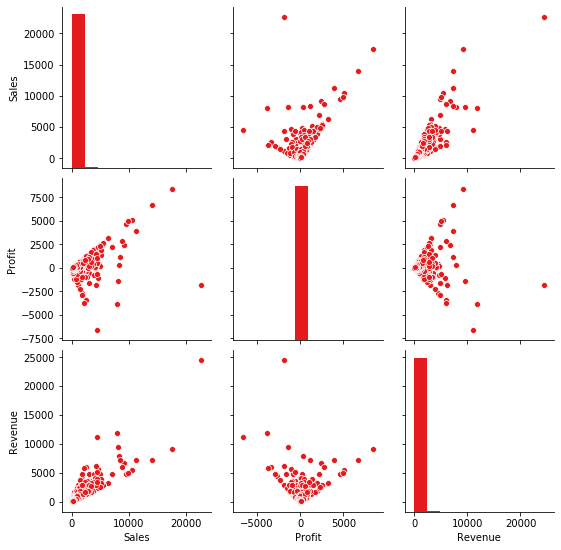

In [53]:
sns.set_palette("Set1")
sns.pairplot(df)

Representing Variables with Visualization.

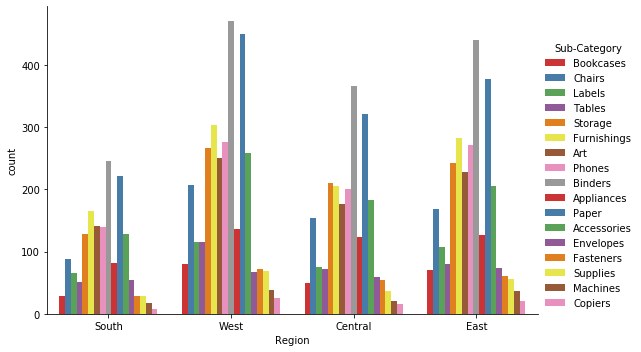

In [54]:
sns.catplot("Region", hue="Sub-Category", data=df, kind="count", aspect=1.5, palette="Set1")

Distribution of Sub-categories in all different region.

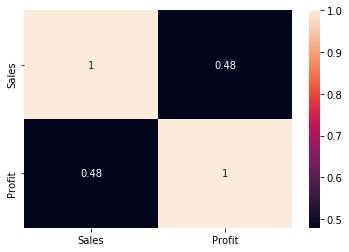

In [55]:
sns.heatmap(corr,annot=True)

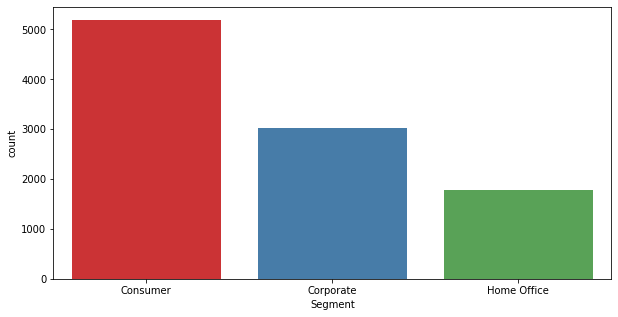

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Segment'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

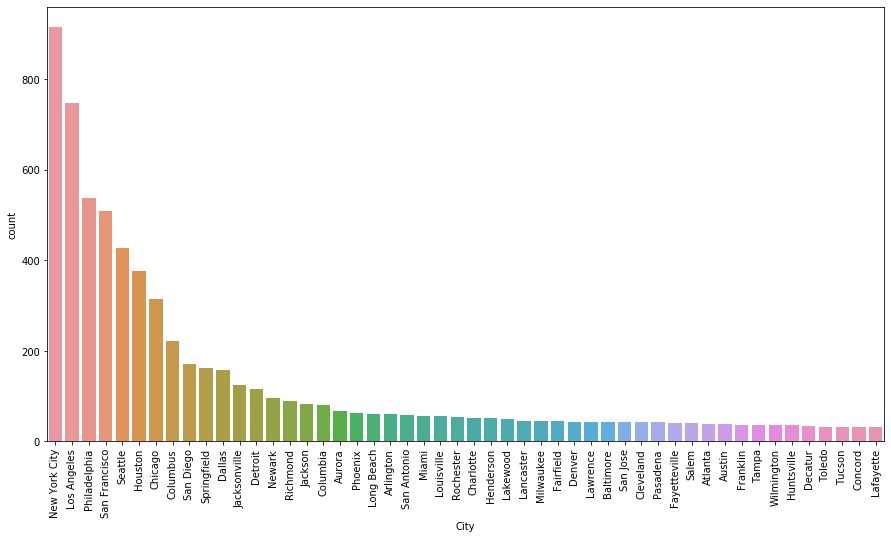

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

Graph is representing all cities where retail business takes place from highest count to lowest.

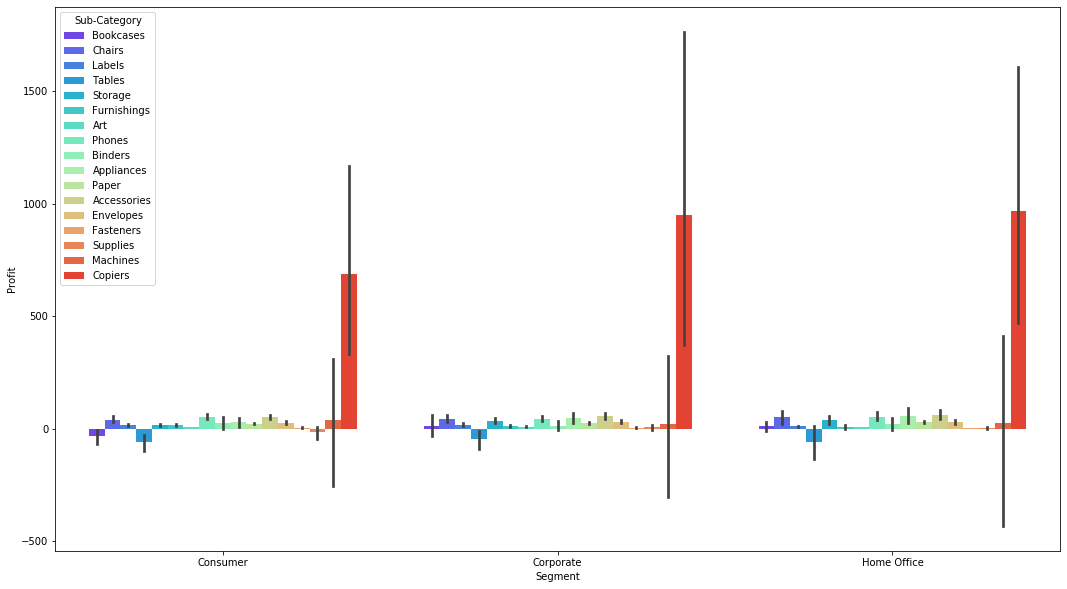

In [58]:
plt.figure(figsize=[18,10])
ax = sns.barplot(x="Segment", y="Profit", hue="Sub-Category", data=df, palette="rainbow")

This visualization is done to check which product provides the highest/lowest profit in each sement.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

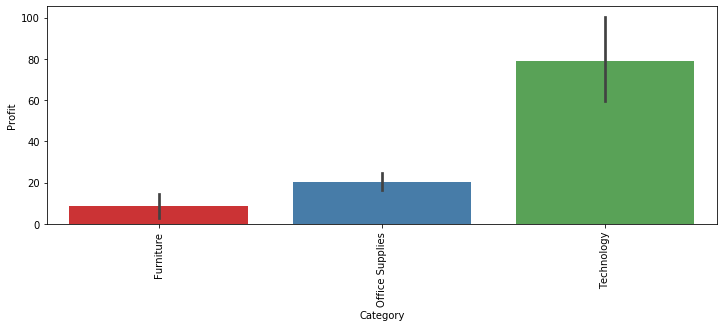

In [59]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['Category'], y=df['Profit'])
plt.xticks(rotation=90)

Figure shows how much profit is earned with each category. Maximum profit is earned by Technology and least by Furniture.

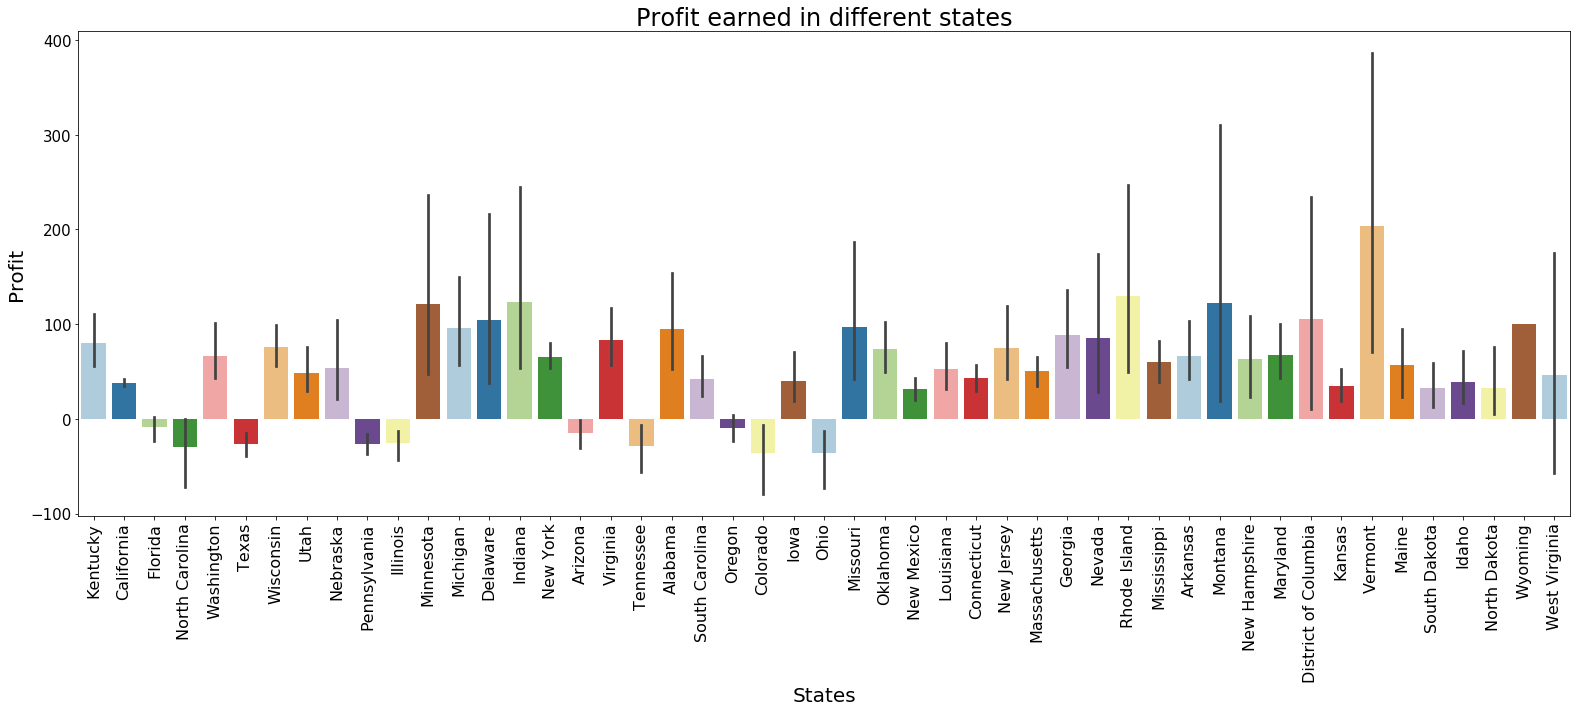

In [60]:
plt.figure(figsize=[22,10])
ax = sns.barplot(x="State", y="Profit", data=df, palette="Paired")
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("Profit earned in different states",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

Profit/Loss earned in different states. Business manager should work on the states which gives loss and should look for the reason behind the loss.

Text(0.5, 1.0, 'Sub-Category representation')

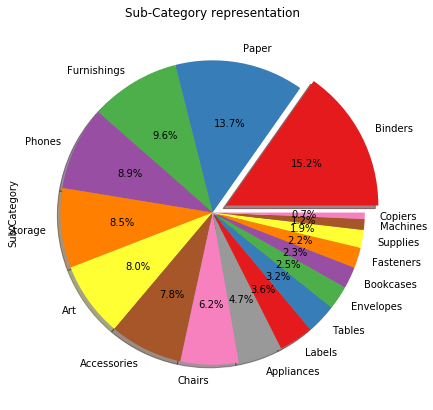

In [61]:
plt.figure(figsize=(15,7))
S_Category=df["Sub-Category"].value_counts()
plt.get_cmap("hsv")
S_Category.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title("Sub-Category representation", fontsize=12)

Representation of product(sub-category) sold in retail business.

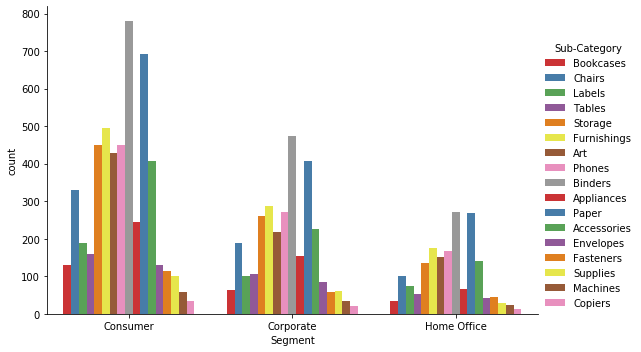

In [62]:
sns.catplot("Segment", hue="Sub-Category", data=df, kind="count", aspect=1.5, palette="Set1")

The figure shows subcategory count in each segment. By this representation manager will look into the areas where he needs to focus to improve sales and profit.

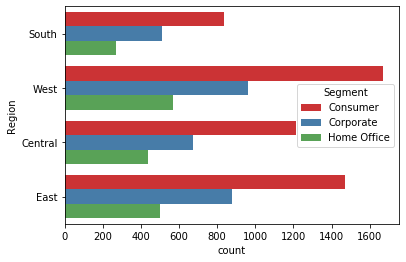

In [63]:
sns.countplot(y="Region", hue="Segment", data=df);

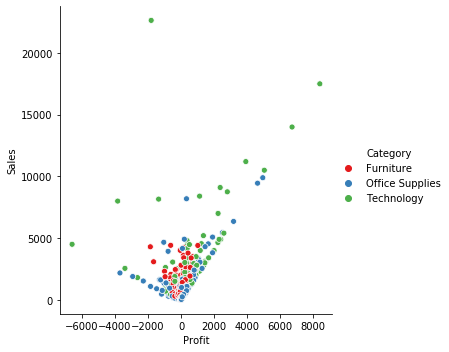

In [64]:
sns.relplot(x="Profit", y="Sales", hue="Category", data=df)

It shows how much profit is earned on sales in each category. As we can see high or less sales of a product has less impact on the profit. 

Text(0, 0.5, 'Profit and Sales')

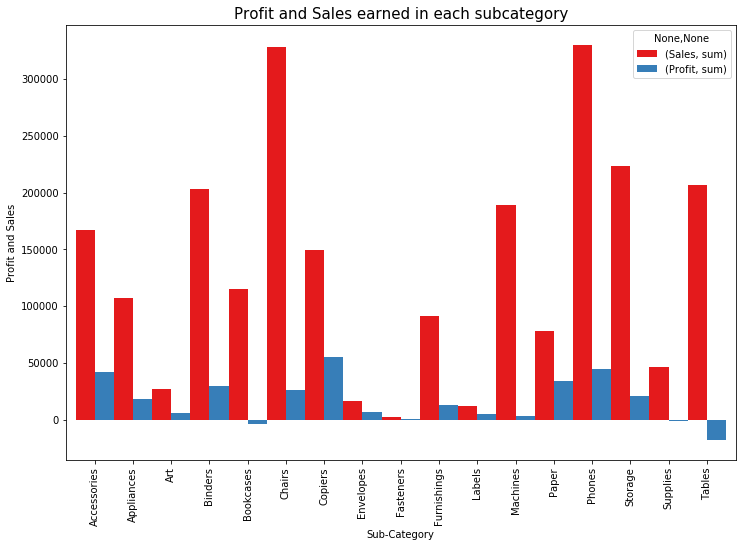

In [65]:
s_p=df.groupby("Sub-Category")["Sales","Profit"].agg(["sum"])
s_p.plot.bar(width=1, figsize=(12,8))
plt.title("Profit and Sales earned in each subcategory", fontsize=15)
plt.xlabel("Sub-Category")
plt.ylabel("Profit and Sales")

The final representation of Profit and Sales of Products. In this we have a very clear picture of profit and sales. There is no specific margin of profit in respect to sales. If sales is very high of a product, it doesn't show extreme rise in profit and vice-versa. Profit increasing or decreasing with respect to the category of products and not much by sales of product.

### 5. Interpretation and Analysis of Dataset

As a business manager, I would work on the following aspects and areas to improve business profit.
<br>1. The States which gives negative Profit or Loss are the weakest areas of business- **Texas, Ohio, Pennsylvania, Illinois, North Carolina, Colorado, Tennessee, Arizona, Florida, Oregon.**
<br>2. **Category Furniture** gives lowest profit among all category. 
<br>3. **Segment Home Office** has the lowest demand in this retail business. Manager should update the design or pattern or target the required audience to make profit in specific segment.
<br>4. **Tables, Bookcases, Supplies** product/ Sub-Category gives lose or poor result in terms of profit. To improve business profit manager needs to search for the reason for the dropdown of a product.
<br>5. By analysing the data, we know that less sales lead to poor profit but high sale of a product doesn't guarantee high rise in profit. 
<br>**Problems occuring in business.**
<br>In this EDA we have analyse that there are no certain balance on purchase and sale of a products which gives profit /loss. Category furniture and 2 subcategories under it causing loss to business. Category furniture have strong impact on Profit earned.